In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split


In [22]:
df = pd.read_csv("michaels_mlb_cleaned_data.csv")
df


,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,b_count,s_count,pitch_num
0,-0.390,3.600,91.0,84.2,1972.614,190.202,7.1,3.4,23.8,-3.210,...,-1.77,9.82,53.0,11.0,B,B,FC,1.0,0.0,2.0
1,-0.005,2.257,85.9,80.4,41.087,214.714,-1.0,8.1,23.9,-0.203,...,-0.13,0.14,48.0,5.0,F,S,SL,0.0,0.0,1.0
2,0.820,3.193,94.1,86.7,2376.304,205.009,30.8,3.2,23.8,-9.536,...,-4.96,10.59,58.0,12.0,S,S,FF,2.0,1.0,4.0
3,-0.088,2.358,94.1,87.2,2504.011,216.915,41.2,4.1,23.8,-14.264,...,-7.38,9.78,25.0,5.0,E,X,FF,3.0,2.0,8.0
4,1.370,2.934,92.6,85.7,2235.653,204.604,26.4,3.5,23.8,-8.694,...,-4.64,10.10,24.0,12.0,B,B,FF,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.324,1.185,88.7,81.4,2083.680,239.627,30.2,6.8,23.8,-16.057,...,-9.52,5.54,41.0,14.0,B,B,FS,0.0,2.0,3.0
49996,1.000,2.212,92.2,84.9,1711.688,230.264,25.1,5.7,23.8,-12.244,...,-6.65,5.49,70.0,14.0,C,S,FF,0.0,0.0,1.0
49997,-0.403,2.133,94.4,88.2,2234.726,221.635,37.0,4.6,23.9,-14.146,...,-7.20,8.06,37.0,4.0,D,X,FF,0.0,1.0,2.0
49998,0.365,1.991,88.4,81.4,1864.988,227.714,26.4,6.0,23.8,-12.294,...,-7.29,6.58,45.0,9.0,X,X,SI,0.0,1.0,2.0


In [23]:
# BASIC DECISION TREE MODEL 
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
# x = df[['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'vx0', 'vy0', 'vz0',
#        'x', 'x0', 'y', 'y0', 'z0', 'pfx_x', 'pfx_z']]
y = df["pitch_type"].to_frame()

x = df[["px", "pz", "start_speed", "end_speed",
"spin_rate","spin_dir", "break_angle",
"break_length",
#"break_y",
"ax", "ay", "az",
#"sz_bot", "sz_top",
"vx0", "vy0", "vz0", "x",
"x0", "y", #"y0",
"z0", "pfx_x", "pfx_z", "nasty",
#"zone"
]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
kfold = model_selection.KFold(n_splits = 3,
                       random_state = 42)

In [6]:
base_cls = DecisionTreeClassifier()

In [7]:
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = 100,
                          random_state = 42)

In [9]:
results = model_selection.cross_val_score(model, x_train, y_train, cv = kfold)

In [10]:
results.mean()

0.8710666666666667

In [11]:
results = model_selection.cross_val_score(model, x_test, y_test, cv = kfold)

In [12]:
results.mean()

0.8623202414570157

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0, algorithm='SAMME')
clf.fit(x_train, y_train) 

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

In [14]:
results = model_selection.cross_val_score(clf, x_test, y_test, cv = kfold)

In [15]:
results.mean()

0.7652798241815163

In [24]:
from sklearn.preprocessing import StandardScaler
df = df.copy()
y = df["pitch_type"].to_frame()

t = df[["px", "pz", "start_speed", "end_speed",
"spin_rate","spin_dir", "break_angle",
"break_length",
"break_y",
"ax", "ay", "az",
"sz_bot", "sz_top",
"vx0", "vy0", "vz0", "x",
"x0", "y", "y0",
"z0", "pfx_x", "pfx_z", "nasty",
"zone"
]]
x = StandardScaler().fit_transform(t)


In [25]:
# PCA. USED @towarddatascience AND @machinelearningmastery for guidance
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [26]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,principal component 1,principal component 2,pitch_type
0,-1.282340,-0.367269,FC
1,2.592542,-1.190070,SL
2,-3.134518,-0.052607,FF
3,-3.324363,-0.925092,FF
4,-2.526926,0.303264,FF
...,...,...,...
49995,-1.464719,-1.552122,FS
49996,-1.623832,-0.298654,FF
49997,-2.618182,-0.969531,FF
49998,-1.032041,-0.835267,SI


In [27]:
finalDf["pitch_type"].unique()

array(['FC', 'SL', 'FF', 'CU', 'SI', 'CH', 'FT', 'KN', 'KC', 'FS'],
      dtype=object)

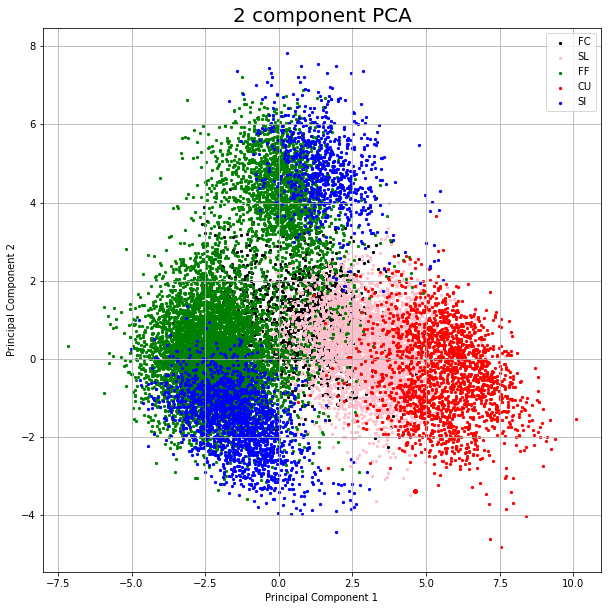

In [45]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component PCA', fontsize = 20)
p = ['FC', 'SL', 'FF', 'CU', 'SI']
colors = ['black', 'pink',"green", "red", "blue"]
for pitch, color in zip(p,colors):
    i = finalDf['pitch_type'] == pitch
    ax.scatter(finalDf.loc[i, 'principal component 1'], finalDf.loc[i, 'principal component 2'], c = color, s = 5)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.legend(p)
ax.grid()

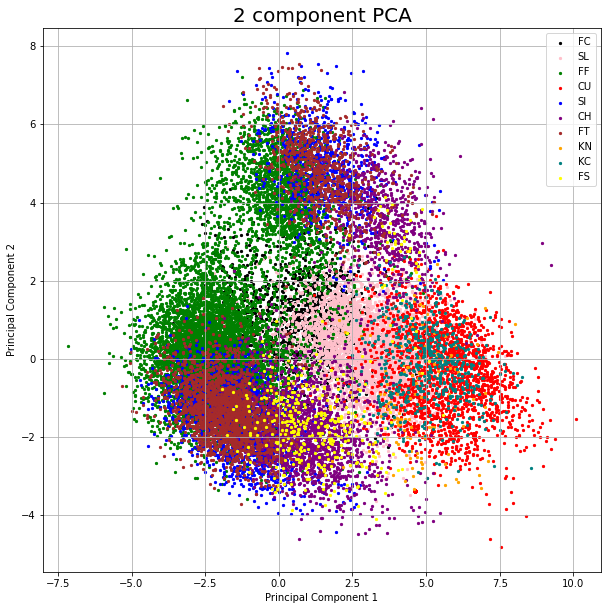

In [48]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component PCA', fontsize = 20)
p = ['FC', 'SL', 'FF', 'CU', 'SI', 'CH', 'FT', 'KN', 'KC', 'FS']
colors = ['black', 'pink',"green", "red", "blue", "purple", "brown", "orange", "teal", "yellow"]
for pitch, color in zip(p,colors):
    i = finalDf['pitch_type'] == pitch
    ax.scatter(finalDf.loc[i, 'principal component 1'], finalDf.loc[i, 'principal component 2'], c = color, s = 5)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.legend(p)
ax.grid()